# 6.2 Regression

1. Load the Galton dataset into a Pandas dataframe?
    *  http://www.randomservices.org/random/data/Galton.html
    
2. Summarize the dataset:
    * Number of rows
    * Average height of male/female kids
    * Std deviation of male/female kids
    
3. Create 2 regression models: for predicting the childs height based on (i) father height and (ii) mother's height!

4. Compute the model quality parameters: $R^{2}$ and $MSE$!


Help/Example: <http:///pygot.wordpress.com/2017/03/25/simple-linear-regression-with-galton/>

In [16]:
%matplotlib inline
import csv
import requests # pip install requests for easy http request for CSV data
import numpy as np
import pandas as pd

# 6.2.1 Load Data

In [17]:
df=pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep="\t")

In [18]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [19]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


In [20]:
df_long=pd.melt(df, value_vars=["Father", "Mother"], 
        id_vars=["Height", "Kids", "Gender", "Family"],
        value_name="Parent_Height",
        var_name="Parent_Gender")

In [21]:
df_long.head(5)

,Height,Kids,Gender,Family,Parent_Gender,Parent_Height
0,73.2,4,M,1,Father,78.5
1,69.2,4,F,1,Father,78.5
2,69.0,4,F,1,Father,78.5
3,69.0,4,F,1,Father,78.5
4,73.5,4,M,2,Father,75.5


In [22]:
df.groupby("Gender").size()

Gender
F    433
M    465
dtype: int64

# 6.2.2 Regression Model

In [23]:
x=pd.Series(df['Father'])
y=pd.Series(df['Height'])
X = x[:,np.newaxis] # manipulate shape
 
# Data for Mother - Child Height relationship is x2 versus y2
x2=pd.Series(df['Mother'])
y2=pd.Series(df['Height'])
X2 = x2[:,np.newaxis] # manipulate shape

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train) # X is row/col fmt, y is vector
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [0.4160534]
Intercept: 
 38.02589636965351


Make prediction

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
ypred_test = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, ypred_test))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred_test))

Mean squared error: 11.65
Variance score: 0.06


# 6.2.3 Plot

In [27]:
xpred = np.linspace(60, 80) # series of 50 (default) numbers between 60 and 80
Xpred = xpred[:, np.newaxis] # manipulate shape, add col dimension
ypred = model.predict(Xpred)

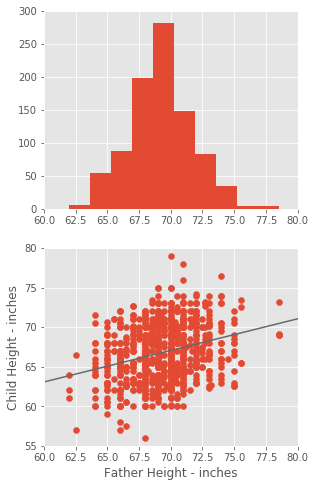

In [29]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
 
plt.figure(1, (10,8)) # 10 x 8 figure
 
# Histogram of x (Father height)
plt.subplot(2,2,1)
plt.hist(x)
plt.axis([60,80,0,300])
 
# Scatter plot with line-fit
plt.subplot(2,2,3)
plt.scatter(x,y)
plt.plot(Xpred,ypred, color="dimgrey")
plt.axis([60,80,55,80])
plt.xlabel("Father Height - inches")
plt.ylabel("Child Height - inches")
 
plt.show()